In [6]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def plotSequence(y):
    n = np.linspace(0, y.size, y.size)
    plt.scatter(n, y)
    plt.plot([n, n], [np.zeros(n.size), y], color='gray', linestyle="--")
    return

# Proportional control

We have a car robot equipped with a distance sensor. The robot is programmed to move with a velocity negatively proportional to the distance from the wall. That is:

$v[n] = -k_p d[n]$

And the distance measures are taken 10 times per second, that is, the sampling period is $\tau = 0.1$s. 

The discrete motion model follows the kinematic expression (to be aware that no dynamics, forces, masses, inertias are considered):

$d[n] = d[n-1] + \tau v[n-1]$

If we substitute the control law, we get:

$\begin{matrix}
d[n] &=& d[n-1] + \tau (- k_p d[n-1])\\
 &=& d[n-1] - 0.1\tau k_p d[n-1]\\
 &=& (1-0.1 k_p) d[n-1]
 \end{matrix}$

This is a first order linear difference equation of the form $y[n] = \lambda y[n-1]$. We know that depending on the value that $\lambda$ takes, the system will have a certain dynamics or the other.

What behavior do we want for our robot system that we want to reach the wall? We don't want the robot to oscillate around the wall, and we don't want to go away, so we want to set it to $0< \lambda < 1$. This translate in setting the $k_p$ such that

$\begin{matrix}
0 &<& 1-0.1k_p &<& 1  \\
-1 &<& -0.1 k_p &<& 0 \\
10 &<& k_p &<& 0
\end{matrix}$

Next, we define the `carSys()` model and we let you play with different values of $k_p$ and use a slider to interact with the sequence steps. Try to answer the following questions:

1. What happens if $k_p = 0$?
2. What happens if  $k_p \approx 0$, but still $k_p > 0$?
3. What happens if $k_p < 0$?
4. What happens if $k_p = 10$?
5. What happens if $k_p = 11$?
6. Time to get to the wall using $k_p = 0.1$?
7. Now, answer 6, considering a zero threshold of $0.001$ ($1$ milimeter)
8. Time to get to the wall using $k_p = 9.0$ using the same threshold?
9. What are the units of $k_p$?
10. Is the maximum velocity that the robot can make considered in the control law? How would you add implement it?

In [4]:
def carSys(n, kp, d0):
    return d0*pow(1-0.1*kp,n)

# The system starts at 11m from the wall
d0 = 11

In [5]:
# optimal values of kp [0,10]: 
# 0 < kp < 10
# try different cases
kp = 5.0

def interactiveCar(n):
    print("Total time: ", n*0.01, " seconds")
    print("Distance to wall: ", carSys(n, kp, d0) )
    return 

interact(interactiveCar, n=(0,100,1))

Total time:  0.14  seconds
Distance to wall:  0.00067138671875


# Proportional control with input

Consider now that you want to stop the robot car at any desired position $d_{des}[n]$. What would change in  all the previous section?

The discrete motion model remains, since the robot is the same: $d[n] = d[n-1] + \tau v[n-1]$

Now, the control law looks like:

$v[n] = k_p (d_{des}[n] - d[n])$

In fact, if we set $d_{des} = 0$ (that is, the position of the wall), we end up with the same control law as before, that is $v[n] = -k_p d[n]$. Note that, we are __commanding__ a velocity, $v[n]$ proportional to the error between our desired and __measured__ position, $e[n] = d_{des}[n] - d[n]$. 

Substituting the new control law into the motion model, we get:

$\begin{matrix}
d[n] &=& d[n-1] + \tau k_p(d_{des}[n-1]-  d[n-1])\\
 &=& d[n-1] + k_p d_{des}[n-1] - 0.1\tau k_p d[n-1] \\
 &=& (1-0.1 k_p) d[n-1] + 0.1k_p d_{des}[n-1]
 \end{matrix}$
 
Which is a control system of the form: 
 
$y[n] = \lambda y[n-1] + b x[n-1]$

The way to study these kind of system, and in general, all systems, is to obtain their response to unit sample and unit step sequences. Let's check what form the solution will have for both cases.



## Unit sample response

Consider the unit sample sequence defined as

$x[n] = \delta[n- n_d] = \left\{ \begin{matrix}
1, &\text{if} \; n = n_d \\
0, & \text{if} \; n \neq n_d
\end{matrix} \right.$

We analyze by intervals, assuming that the initial state is $y[0] = 0$

* Interval $n \leq n_d$: 

$x[n-1] = 0$, hence $y[n] = 0$

* When $n = n_d +1$:

$\begin{matrix}
y[n_d +1] &=& \lambda y[n_d] + b x[n_d] \\
&=& \lambda 0 + b 1 \\
&=& b
\end{matrix}$

* Finally, $n > n_d + 1$:

$x[n] = 0$, hence $y[n] = \lambda y[n-1]$, which we know is a first order linear difference equation.

So the solution would be somthing like:

$y[n] = \left\{ \begin{matrix}
0, & \text{if} \; n \leq n_d \\
b, & \text{if} \; n = n_d+1 \\
\lambda y[n-1] & \text{if} \; n > n_d +1
\end{matrix} \right.$

or in a more compact way

$y[n] = \lambda^{n-n_d} \frac{b}{\lambda}, \text{for} \; n > n_d$

A feature that it is usually studied is the value of the system when times is very large, that is, when $n \rightarrow \infty$. In the stable case, $\|\lambda\| < 1$, we can say that 

$y[\infty] = 0$

Since it falls in the last interval where we have a first order linear difference equation.

<IPython.core.display.Javascript object>


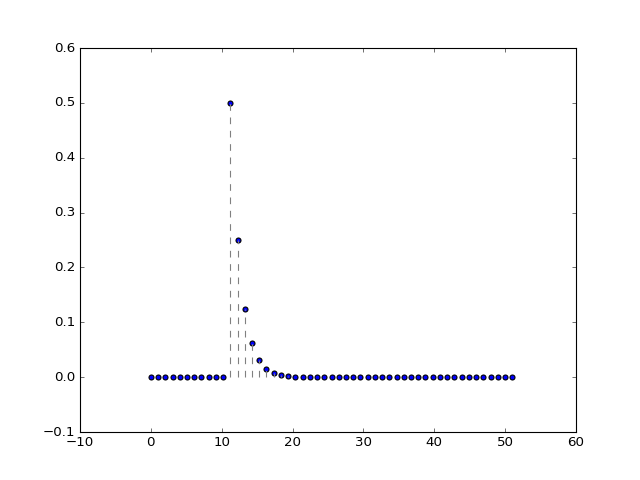

<function __main__.carSys_unitSampleResponse>

In [53]:
def carSys_unitSampleResponse(n):
    # start with the robot already at the wall
    # but try other initial distance after understanding the system
    d0 = 0
    
    # This is the moment where we have the unit sample
    nd = 10
    
    # Let's use 5.0, but you can try other values later
    kp = 5.0

    # This represent the stability of the system when n > nd +1
    lmbda = 1 - 0.1*kp
    
    # THINK OF THE MEANING OF THIS VALUE
    b = 0.1*kp
    
    # This initializes the sequence
    d = np.zeros(n)
    for i in range(n):
        if i <= nd:
            d[i] = d0
        if i == nd+1:
            d[i] = b + d0
        if i > nd + 1:
            d[i] = lmbda*d[i-1]
            
    # Plot the sequence
    plt.figure()
    plotSequence(d)
    return

# This slider sets the number of samples for the system
interact(carSys_unitSampleResponse, n=(2,100,1))

## Unit step response

Consider the unit step sequence defined as

$x[n] = u[n- n_d] = \left\{ \begin{matrix}
0, &\text{if} \; n < n_d \\
1, & \text{if} \; n \geq n_d
\end{matrix} \right.$

We analyze by intervals, assuming that the initial state is $y[0] = 0$

* Interval $n \leq n_d$: 

$x[n-1] = 0$, hence $y[n] = 0$

* When $n = n_d+1$:

$\begin{matrix}
y[n_d +1] &=& \lambda y[n_d] + b x[n_d] \\
&=& \lambda 0 + b 1 \\
&=& b
\end{matrix}$

* Finally, $n > n_d + 1$:

$x[n] = 1$, hence $y[n] = \lambda y[n-1] + b$, which can be solved iteratively

$\begin{matrix}
y[n_d] &=& 0\\
y[n_d + 1] &=& b \\
y[n_d +2] &=& \lambda b + b \\
y[n_d + 3] &=& \lambda (\lambda b + b) + b = \lambda^2 b + \lambda b + b\\
y[n_d +4] &=& \lambda (\lambda^2 b + \lambda b + b) + b = \lambda^3 b + \lambda^2 b + \lambda b + b\\
\vdots
\end{matrix}$

which can be written in a compact way as

$y[n] = \sum_{m=n_d+1}^{n} \lambda^{m-n_d} \frac{b}{\lambda}, \text{for} \; n > n_d$

<!-- Comment, this is the homework -->
<!-- A feature that it is usually studied is the value of the system when times is very large, that is, when $n \rightarrow \infty$. In the stable case, $\|\lambda\| < 1$, we can write:

$y[\infty] = \lambda y[\infty -1] + b x[\infty -1]$

We can say that $\infty = \infty -1$, since a $1$ makes no difference when we are talking about a large value, so we use the trick of

$y[\infty] = y[\infty - 1]$

and we know that $x[\infty] = 1$, so

$\begin{matrix}
y[\infty] &=& \lambda y[\infty] + b \\
&=& \frac{b}{1-\lambda}
\end{matrix}$

Since it falls in the last interval where we have a first order linear difference equation.
-->

lambda:  0.5
b:  0.5
d[inf]:  1.0


<IPython.core.display.Javascript object>


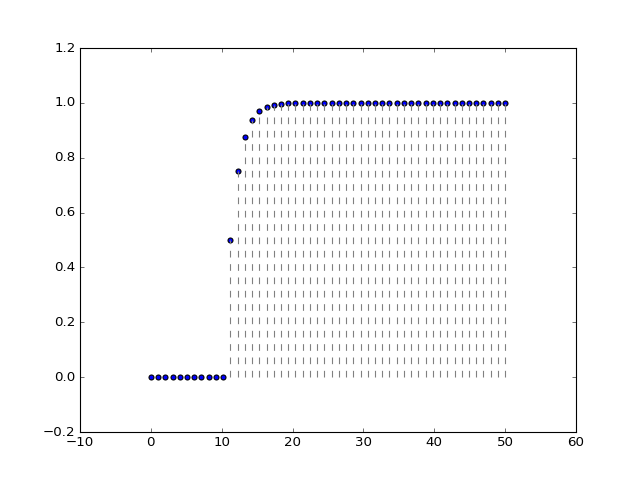

In [54]:
def carSys_unitStepResponse(n):
    # start with the robot already at the wall
    # but try other initial distance after understanding the system
    d0 = 0
    
    # This is the moment where we have the unit step
    nd = 10
    
    # Let's use 5.0, but you can try other values later
    kp = 5

    # This represent the stability of the system when n > nd +1
    lmbda = 1 - 0.1*kp
    print("lambda: ", lmbda)
    
    # THINK OF THE MEANING OF THIS VALUE
    b = 0.1*kp
    print("b: ", b)
    
    print("d[inf]: ", b/(1-lmbda))
    
    # This initializes the sequence
    d = np.zeros(n)
    for i in range(n):
        if i <= nd:
            d[i] = d0
        if i == nd+1:
            d[i] = d0 + b
        if i > nd + 1:
            d[i] = lmbda*d[i-1] + b
            
    # Plot the sequence
    plt.figure()
    plotSequence(d)
    return

# This slider sets the number of samples for the system
interact(carSys_unitStepResponse, n=(2,100,1))